### Import Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/Users/kyotun/Desktop/ML/loyalty-satisfaction/csv/market_example.csv')
data
#Satisfaction comes from user evaluations

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [4]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loyalty')

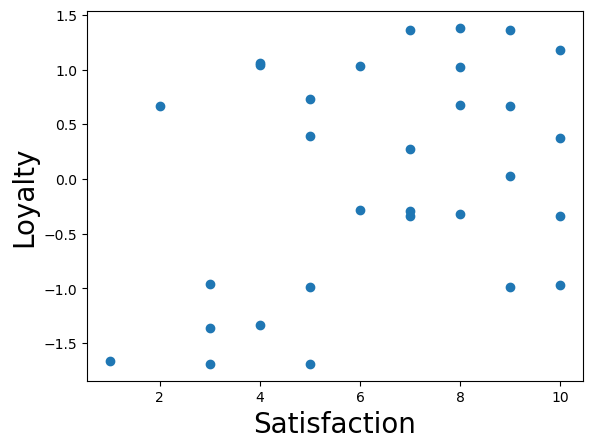

In [5]:
#plot the satisfaction-loyalty scatterplot
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction', fontsize=20)
plt.ylabel('Loyalty', fontsize=20)

In [6]:
x = data.copy()

### Process data

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans= KMeans(2)
kmeans.fit(x)

/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [9]:
clusters = x.copy()
clusters['cluster_prediction'] = kmeans.fit_predict(x) #cluster is 2 therefore we will have two centroids 0s and 1s
clusters

/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Satisfaction,Loyalty,cluster_prediction
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


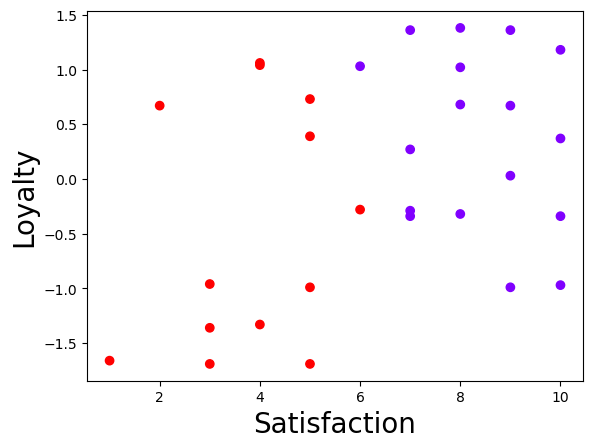

In [10]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_prediction'], cmap='rainbow')
plt.xlabel('Satisfaction', fontsize=20)
plt.ylabel('Loyalty', fontsize=20)
plt.show()
#scatter of the datas without standardization

In [11]:
from sklearn import preprocessing
#preprocessing.scale() : standardize with mean 0, stdev is 1 by default
#it scales each variable(column) seperately
#each column will be standardized
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [12]:
#Check the elbows
wcss = []

for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

[59.999999999999986,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.571285077136385,
 5.34807941029098,
 4.358871893303257,
 3.8823297228499527]

### Test Data & Observe Relations

In [13]:
#you can use 4 or 5 clusters, it is up to your state
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
cluster_new = x.copy() #copy of our datas
cluster_new['cluster_prediction'] = kmeans_new.fit_predict(x_scaled)
#add the predictions from standardized satisfaction as a new column

/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
cluster_new

,Satisfaction,Loyalty,cluster_prediction
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

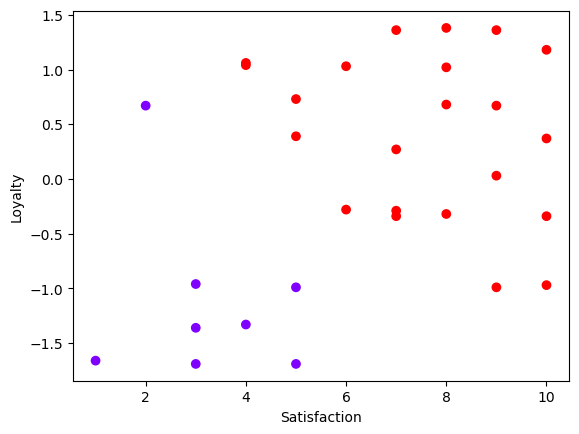

In [15]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['cluster_prediction'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
#allienated: red
#others: purple
#cluster itself made with the standardized Satisfaction and loyalty(loyalty was already standardized otherwise
#we had to the loyalty standardize too) but the values are coming from the original list

In [16]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_prediction'] = kmeans_new.fit_predict(x_scaled)

/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Loyalty')

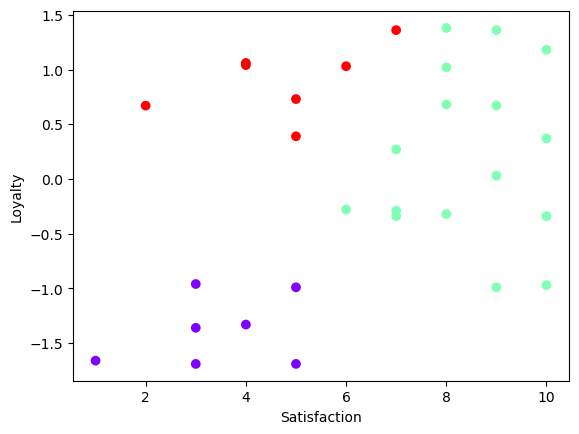

In [17]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['cluster_prediction'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
#allienated: red
#supporters: purple
#others: green

In [18]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new = x.copy() 
cluster_new['cluster_prediction'] = kmeans_new.fit_predict(x_scaled)

/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Loyalty')

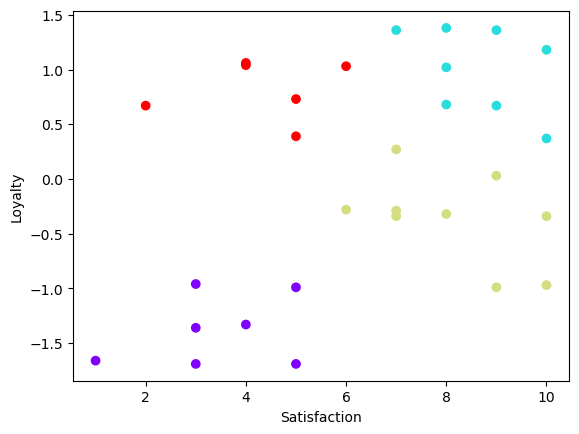

In [19]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['cluster_prediction'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
#allienated: purple
#supporters: green
#fans: blue
#roamers: red

In [20]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
cluster_new = x.copy() 
cluster_new['cluster_prediction'] = kmeans_new.fit_predict(x_scaled)

/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Loyalty')

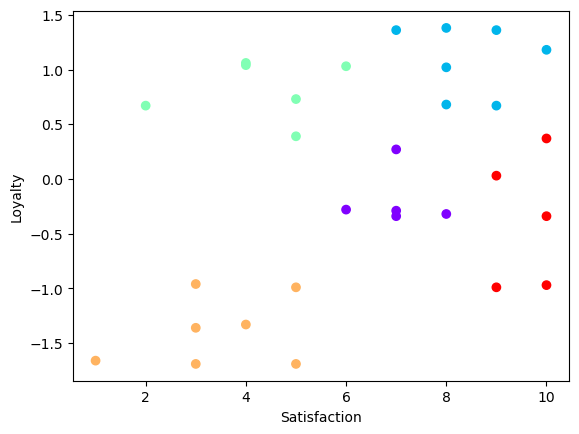

In [21]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['cluster_prediction'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
#allienated: blue
#supporters: green
#fans: purple
#roamers with high satisfaction: red
#roamers with relativelty (to red group) low satisfaction: orange